In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE, SelectKBest, chi2
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler


In [35]:
X_train = pd.read_csv('X_train.csv')
X_test = pd.read_csv('X_test.csv')
y_train = pd.read_csv('y_train.csv')
y_test = pd.read_csv('y_test.csv')

In [36]:
X_train.head()


,age,trestbps,chol,thalch,oldpeak,ca,sex_Male,cp_atypical angina,cp_non-anginal,cp_typical angina,fbs_True,restecg_normal,restecg_st-t abnormality,exang_True,slope_flat,slope_upsloping,thal_normal,thal_reversable defect
0,0.902413,-0.083946,-0.262575,-0.694187,1.983624,-0.36137,True,False,False,False,False,False,True,True,True,False,True,False
1,0.034776,0.987771,0.223659,-0.614999,-0.794406,-0.36137,True,False,True,False,False,True,False,False,True,False,True,False
2,-0.290587,-0.083946,1.287871,0.097694,-0.331401,-0.36137,True,False,True,False,False,True,False,False,True,False,True,False
3,-0.399042,-0.619805,0.186962,0.810387,0.687210,-0.36137,False,False,True,False,False,True,False,False,True,False,True,False
4,-0.182133,-0.619805,1.159431,1.364703,-0.609204,-0.36137,True,True,False,False,False,True,False,False,False,True,True,False


In [37]:
y_train.head()

,num
0,1
1,0
2,1
3,0
4,0


In [38]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

importances = pd.Series(rf.feature_importances_, index=X_train.columns)
importances = importances.sort_values(ascending=False)

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


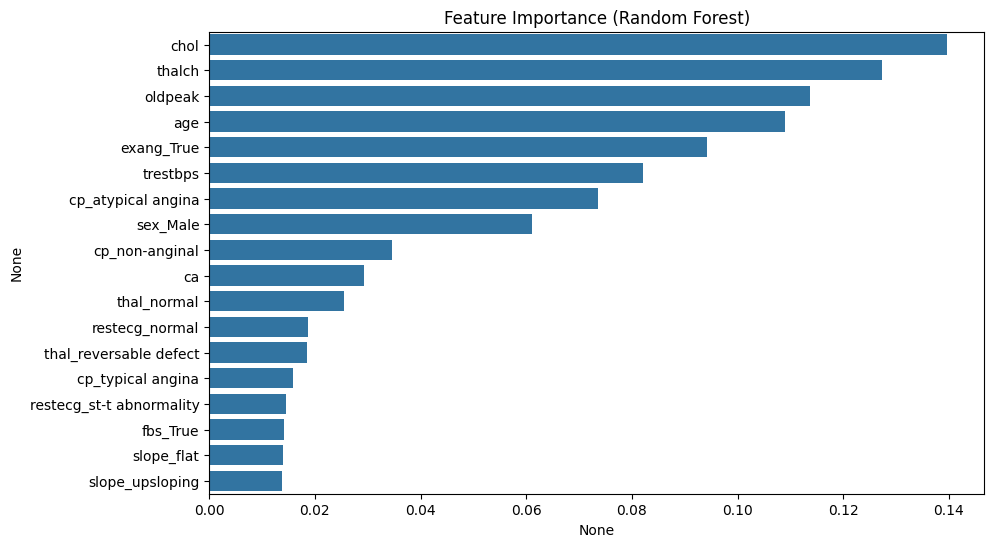

In [39]:
plt.figure(figsize=(10,6))
sns.barplot(x=importances, y=importances.index)
plt.title("Feature Importance (Random Forest)")
plt.show()

In [40]:
top_rf_features = importances.head(10).index.tolist()
print("Top RF Features:", top_rf_features)

Top RF Features: ['chol', 'thalch', 'oldpeak', 'age', 'exang_True', 'trestbps', 'cp_atypical angina', 'sex_Male', 'cp_non-anginal', 'ca']


In [41]:
lr = LogisticRegression(max_iter=1000, solver='liblinear')
rfe = RFE(lr, n_features_to_select=8)
rfe.fit(X_train, y_train)


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

RFE(estimator=LogisticRegression(max_iter=1000, solver='liblinear'),
    n_features_to_select=8)

In [42]:
rfe_features = X_train.columns[rfe.support_].tolist()
print("Top RFE Features:", rfe_features)

Top RFE Features: ['oldpeak', 'sex_Male', 'cp_atypical angina', 'cp_non-anginal', 'cp_typical angina', 'exang_True', 'slope_flat', 'thal_normal']


In [43]:
final_features = list(set(top_rf_features) | set(rfe_features))
print("Final Selected Features:", final_features)

Final Selected Features: ['sex_Male', 'oldpeak', 'thal_normal', 'cp_atypical angina', 'trestbps', 'slope_flat', 'age', 'thalch', 'cp_typical angina', 'exang_True', 'ca', 'cp_non-anginal', 'chol']


In [44]:
X_train_FS = X_train[final_features]
X_test_FS = X_test[final_features]

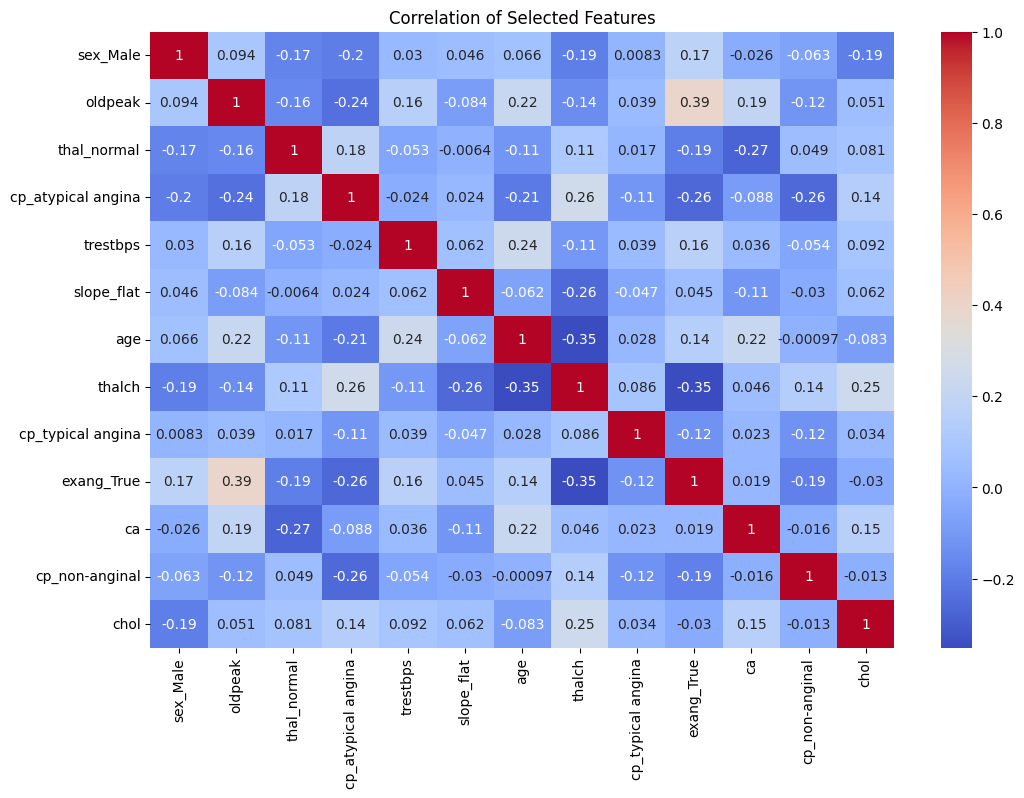

In [45]:
plt.figure(figsize=(12, 8))
sns.heatmap(X_train_FS.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation of Selected Features")
plt.show()

In [46]:
X_train_FS.to_csv('X_train_FS.csv', index=False)
X_test_FS.to_csv('X_test_FS.csv', index=False)